# Part 1: Load a graph network

First, import the libraries we needed:

In [32]:
import matplotlib.pyplot as plt
import pprint

import networkx as nx
from networkx.algorithms.distance_measures import eccentricity

pp = pprint.PrettyPrinter()

Next, load and preepare the network data set. I have selected a small network representing the games between American division IA football teams in the year 2000 season. Source: <https://networkx.github.io/documentation/stable/auto_examples/graph/plot_football.html>.

Parse the GML file as plain text and examine the first lines:

In [33]:
glm_txt = open('football.gml').read()
glm = glm_txt.split('\n')

glm[0:10]

['Creator "Mark Newman on Sat Jul 22 05:32:16 2006"',
 'graph',
 '[',
 '  directed 0',
 '  node',
 '  [',
 '    id 0',
 '    label "BrighamYoung"',
 '    value 7',
 '  ]']

then feed it to the `parse_gml` function to get a graph object. Then, check the value of the `size` method to confirm it is in line with our expectations:

In [34]:
G = nx.parse_gml(glm)
G.size()

613

# Part 2: Basic analysis

The first task is to calculate the graph's _diameter_. But first, let's introduce the concept of _eccentricity_. 

Eccentricity is a property of an individual node within a graph network. It can be calculated by first finding the distances between the node $v$ and all other nodes in the graph. Thus the eccentricity of $v$, or $e(v)$, is the maximum value of all these distances.

The `networkx` library provides an algorithm that calculates the eccentricity of each node in a graph network:

In [35]:
E = eccentricity(G)
pp.pprint(E)

{'AirForce': 3,
 'Akron': 4,
 'Alabama': 4,
 'AlabamaBirmingham': 4,
 'Arizona': 4,
 'ArizonaState': 4,
 'Arkansas': 4,
 'ArkansasState': 4,
 'Army': 4,
 'Auburn': 3,
 'BallState': 4,
 'Baylor': 4,
 'BoiseState': 3,
 'BostonCollege': 4,
 'BowlingGreenState': 4,
 'BrighamYoung': 3,
 'Buffalo': 4,
 'California': 4,
 'CentralFlorida': 4,
 'CentralMichigan': 4,
 'Cincinnati': 3,
 'Clemson': 4,
 'Colorado': 4,
 'ColoradoState': 4,
 'Connecticut': 4,
 'Duke': 4,
 'EastCarolina': 4,
 'EasternMichigan': 4,
 'Florida': 4,
 'FloridaState': 4,
 'FresnoState': 4,
 'Georgia': 4,
 'GeorgiaTech': 4,
 'Hawaii': 4,
 'Houston': 4,
 'Idaho': 4,
 'Illinois': 3,
 'Indiana': 3,
 'Iowa': 4,
 'IowaState': 3,
 'Kansas': 4,
 'KansasState': 3,
 'Kent': 4,
 'Kentucky': 4,
 'LouisianaLafayette': 4,
 'LouisianaMonroe': 4,
 'LouisianaState': 4,
 'LouisianaTech': 3,
 'Louisville': 4,
 'Marshall': 4,
 'Maryland': 4,
 'Memphis': 4,
 'MiamiFlorida': 4,
 'MiamiOhio': 4,
 'Michigan': 4,
 'MichiganState': 4,
 'MiddleTennes

Now -- the diameter of a graph is simply the maximum eccentricity of all the nodes it contains. Thus:

In [36]:
diam = max(E.values())
print(diam)

4


Similarly, the _radius_ of a graph is the minimum -- as opposed to the maximum -- eccentricity:

In [37]:
r = min(E.values())
print(r)

3


# Part 3: Visualization

Visualize the graph using `networkx`'s own facilities, and save as gexf file:

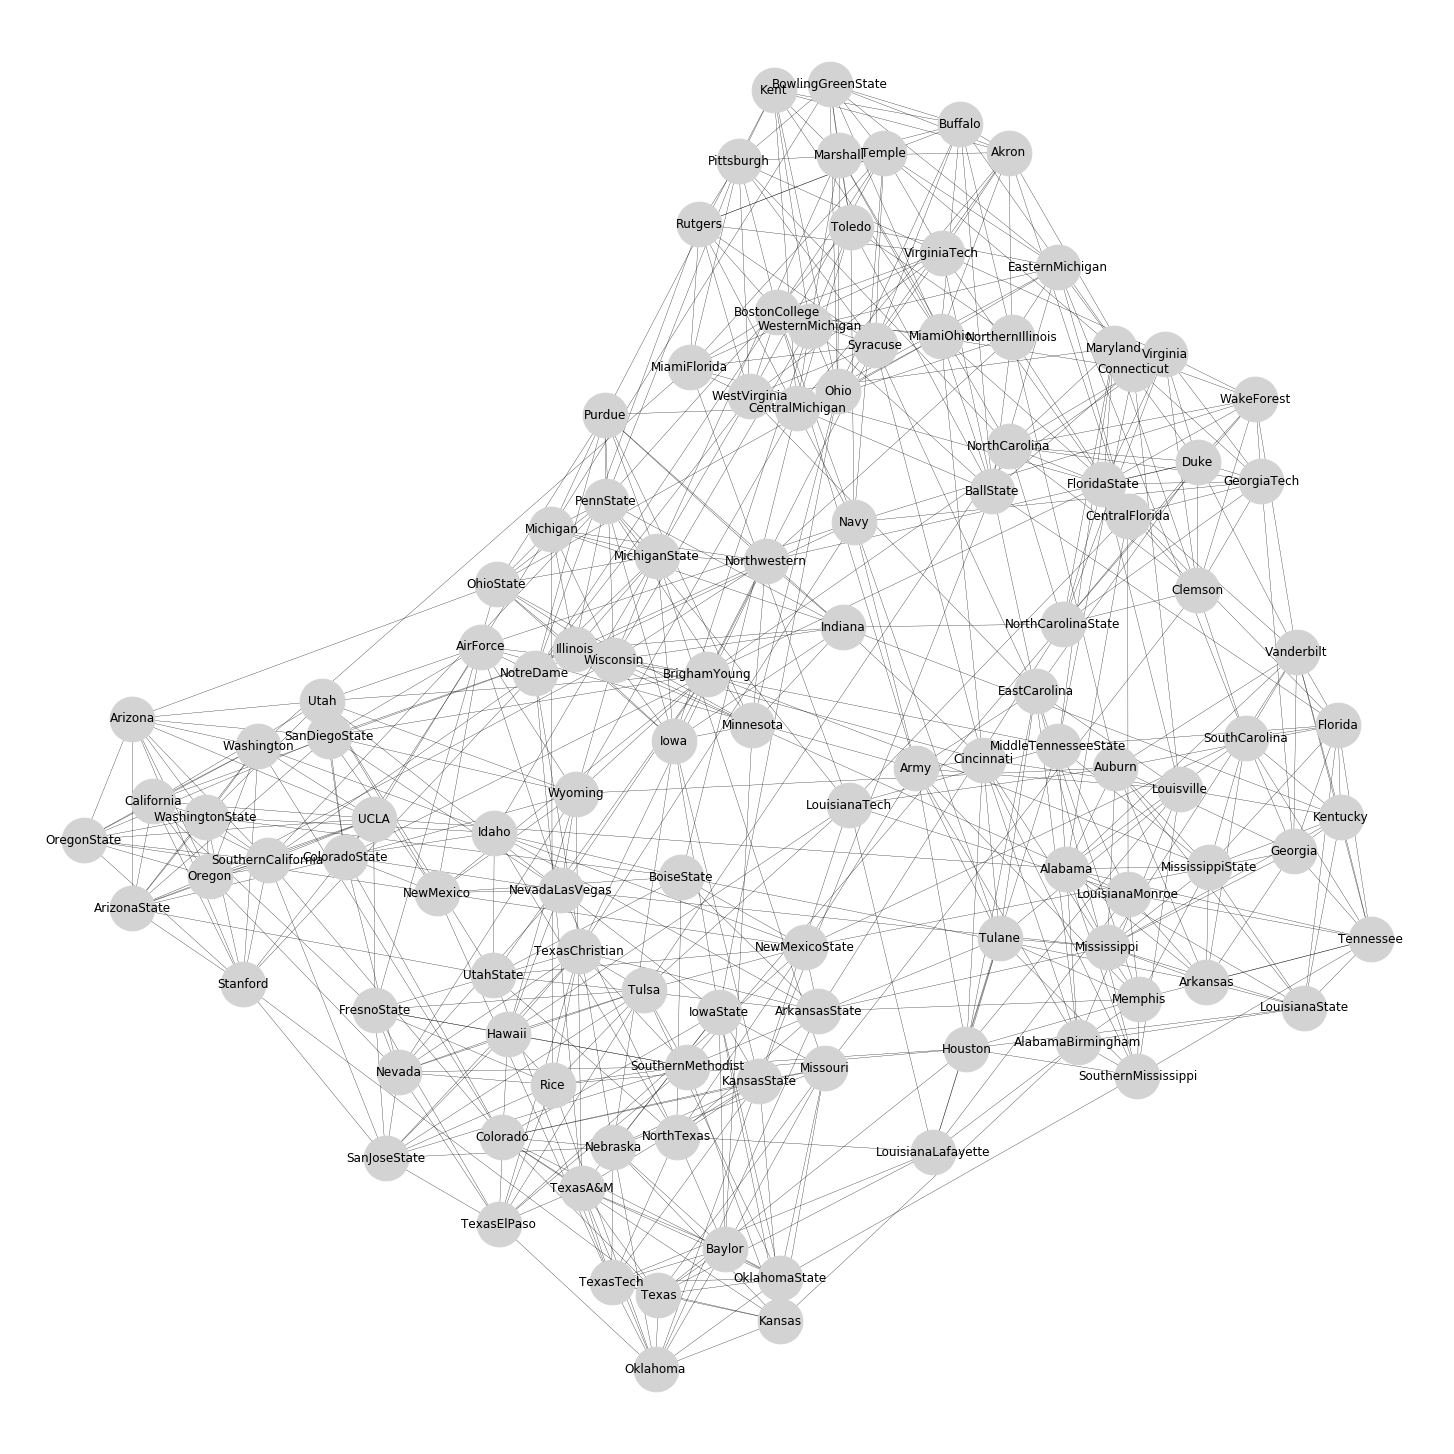

In [38]:
plt.figure(figsize=(20, 20)) 
nx.draw(G, with_labels=True, node_color='lightgray', node_size=2000, width=0.3)
plt.show()

nx.write_gexf(G, 'football_graph.gexf')